In [19]:
import numpy as np
import keras

In [20]:
data = np.loadtxt("ccdefaults.csv", delimiter=';')
np.random.shuffle(data)

In [21]:
print(data.shape)

(30000, 25)


In [22]:
n_training = 28000

x_train = data[:n_training,0:24]
y_train = data[:n_training,24]

x_val = data[n_training:,0:24]
y_val = data[n_training:,24]

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_train /= std

x_val -= mean
x_val /= std

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(24,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

Train on 28000 samples, validate on 2000 samples
Epoch 1/20
28000/28000 [==============================] - 1s 24us/step - loss: 0.6222 - acc: 0.6993 - val_loss: 0.5014 - val_acc: 0.8180
Epoch 2/20
28000/28000 [==============================] - 0s 16us/step - loss: 0.4942 - acc: 0.8092 - val_loss: 0.4635 - val_acc: 0.8245
Epoch 3/20
28000/28000 [==============================] - 1s 19us/step - loss: 0.4754 - acc: 0.8096 - val_loss: 0.4535 - val_acc: 0.8230
Epoch 4/20
28000/28000 [==============================] - 0s 16us/step - loss: 0.4704 - acc: 0.8092 - val_loss: 0.4505 - val_acc: 0.8230
Epoch 5/20
28000/28000 [==============================] - 0s 17us/step - loss: 0.4685 - acc: 0.8087 - val_loss: 0.4493 - val_acc: 0.8225
Epoch 6/20
28000/28000 [==============================] - 1s 18us/step - loss: 0.4677 - acc: 0.8098 - val_loss: 0.4489 - val_acc: 0.8200
Epoch 7/20
28000/28000 [==============================] - 0s 16us/step - loss: 0.4673 - acc: 0.8083 - val_loss: 0.4484 - val_acc:

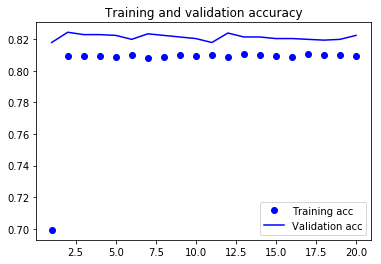

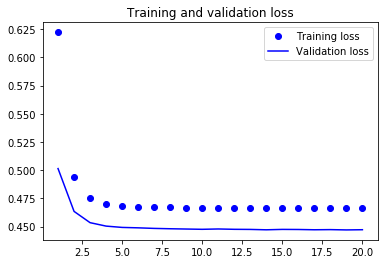

In [24]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
print(model.predict(x_val[3].reshape(-1,24)))

[[ 0.71444869]]
